In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show (img):
    img_r = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR -> RGB順に
    plt.imshow(img_r)
    plt.show()

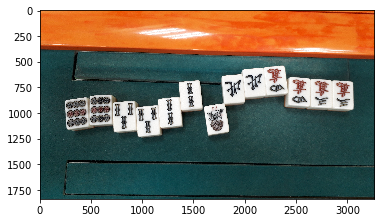

In [3]:
img = cv2.imread('E:/test2/8.jpg')
show(img)

In [4]:
img2 =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [5]:
_,img3 =cv2.threshold(img2, 200, 255, cv2.THRESH_TOZERO_INV );
img3 = cv2.bitwise_not(img3)
_,img4 =cv2.threshold(img3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [6]:
cv2.imwrite("E:/test.jpg", img4)

True

In [7]:
_,contours,hierarchy = cv2.findContours(img4, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [8]:
img_c = cv2.drawContours(img, contours, -1, (0,0,255), 3)

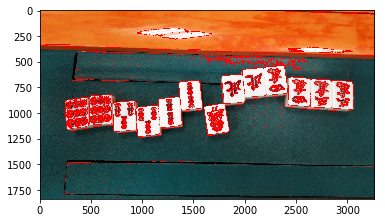

In [9]:
show(img_c)

In [10]:
cv2.contourArea(contours[1])

2.0

In [44]:
min_area = 15000
new_contours =[]
app_contours =[]
for contour in contours:
    if cv2.contourArea(contour)>min_area:
        epsilon = 0.01*cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour,epsilon,True)
        app_contours.append(approx)
        new_contours.append(contour)

In [45]:
len(new_contours)

7

In [46]:
print(len(new_contours[1]))
print(len(app_contours[1]))

3791
24


In [33]:
len(app_contours[0])

4

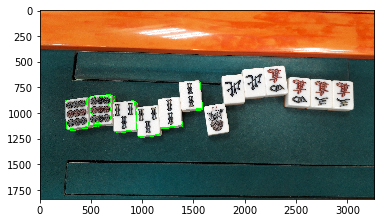

In [56]:
img = cv2.imread('E:/test2/8.jpg')
img_f = cv2.drawContours(img, [new_contours[1]], -1, (0,255,0), 3)
show(img_f)

In [51]:
cv2.imwrite("E:/test.jpg", img_f)

True